 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [26]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [27]:
# Reading whale returns
#Relative path wasn't working, needed to go with absolute path
whale_path = Path(r"C:/Users/dredm/Desktop/Daryl/Fintech_Bootcamp/Git_Repos/uw-fintech-spring-21/Homework/04-Pandas/Instructions/Starter_Code/Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_path, index_col = 'Date', infer_datetime_format=True, parse_dates=True)
whale_df = whale_df.sort_index()
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [28]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [29]:
# Drop nulls
whale_df.dropna(inplace=True)
#check data types to make sure columns are floats. That way don't have to worry about symbols
whale_df.dtypes

whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [30]:
# Reading algorithmic returns
#Relative path wasn't working, needed to go with absolute path
algo_path = Path(r"C:/Users/dredm/Desktop/Daryl/Fintech_Bootcamp/Git_Repos/uw-fintech-spring-21/Homework/04-Pandas/Instructions/Starter_Code/Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_path, index_col = 'Date', infer_datetime_format=True, parse_dates=True)
algo_df = algo_df.sort_index()
algo_df

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [31]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [32]:
# Drop nulls
algo_df.dropna(inplace=True)
#check data types to make sure columns are floats. That way don't have to worry about symbols 
algo_df.dtypes

algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [33]:
# Reading S&P 500 Closing Prices
sp500_path = Path(r"C:/Users/dredm/Desktop/Daryl/Fintech_Bootcamp/Git_Repos/uw-fintech-spring-21/Homework/04-Pandas/Instructions/Starter_Code/Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_path, index_col = 'Date', infer_datetime_format=True, parse_dates=True)
sp500_df = sp500_df.sort_index()
sp500_df

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93
...,...
2019-04-16,$2907.06
2019-04-17,$2900.45
2019-04-18,$2905.03


In [34]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [35]:
#Remove the $ from the closing price
sp500_df["Close"]=sp500_df["Close"].str.replace("$", "")
# Fix Data Types
sp500_df["Close"] = sp500_df["Close"].astype("float")
#check types again
sp500_df.dtypes
#check header
sp500_df.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [36]:
# Calculate Daily Returns
sp_500_rtn_df = sp500_df.pct_change()
sp_500_rtn_df.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [37]:
# Drop nulls
sp_500_rtn_df.dropna(inplace=True)
sp_500_rtn_df.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [38]:
# Rename `Close` Column to be specific to this portfolio.
sp_500_rtn_df = sp_500_rtn_df.rename(columns={'Close': 'SP500'})
sp_500_rtn_df.head()

,SP500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [39]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_df, algo_df, sp_500_rtn_df], axis='columns', join='inner')
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

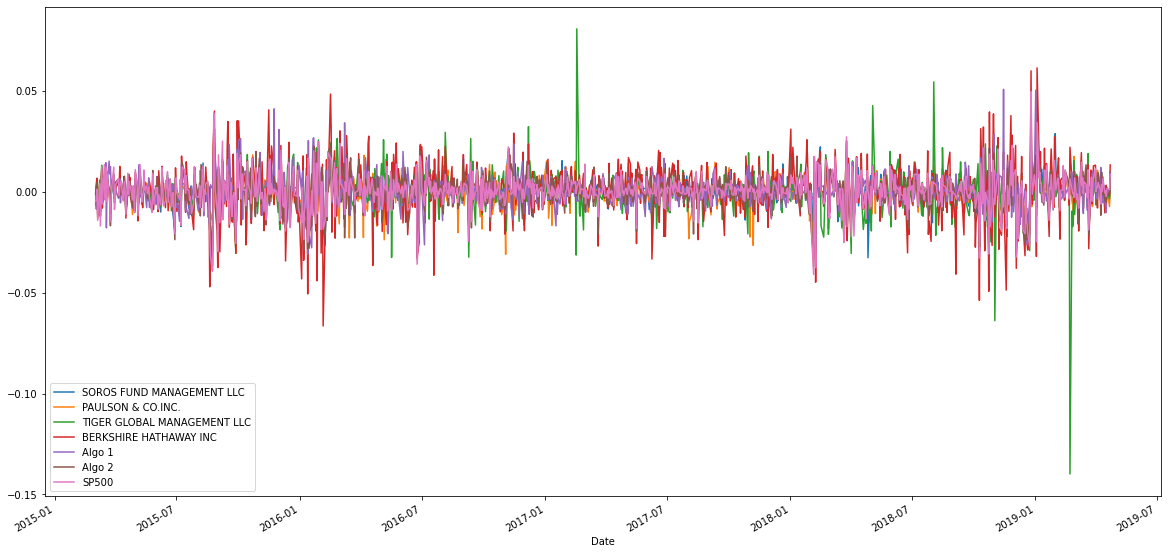

In [40]:
# Plot daily returns of all portfolios
combined_daily_rtn = combined_df
#combined_daily_rtn.head()
combined_daily_rtn.plot(figsize=[20,10])


#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

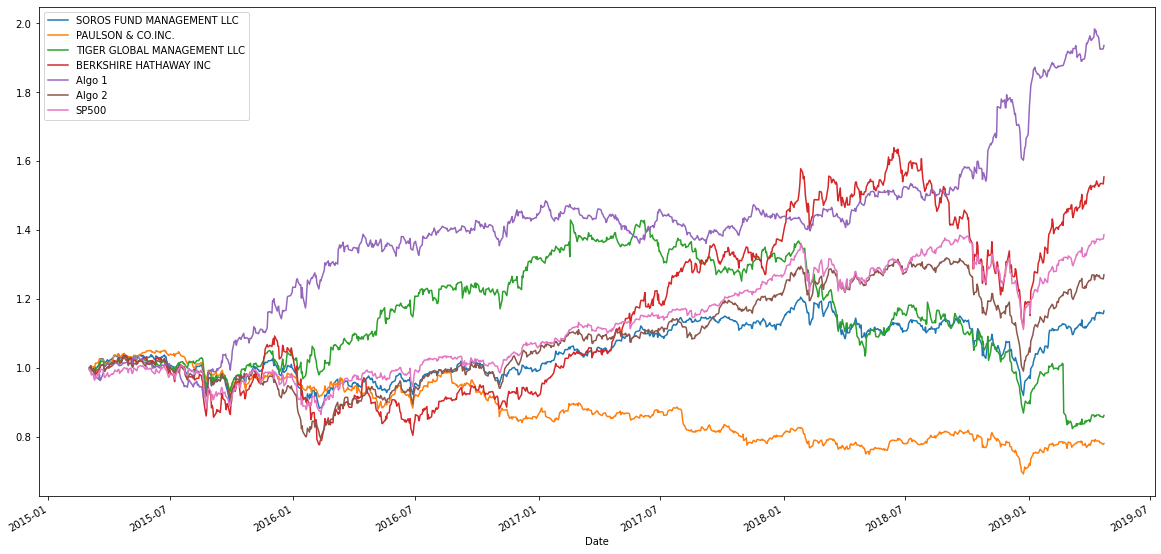

In [41]:
# Calculate cumulative returns of all portfolios
combined_cuml_rtn= (1+combined_daily_rtn).cumprod()

# Plot cumulative returns
combined_cuml_rtn.plot(figsize=[20,10])

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

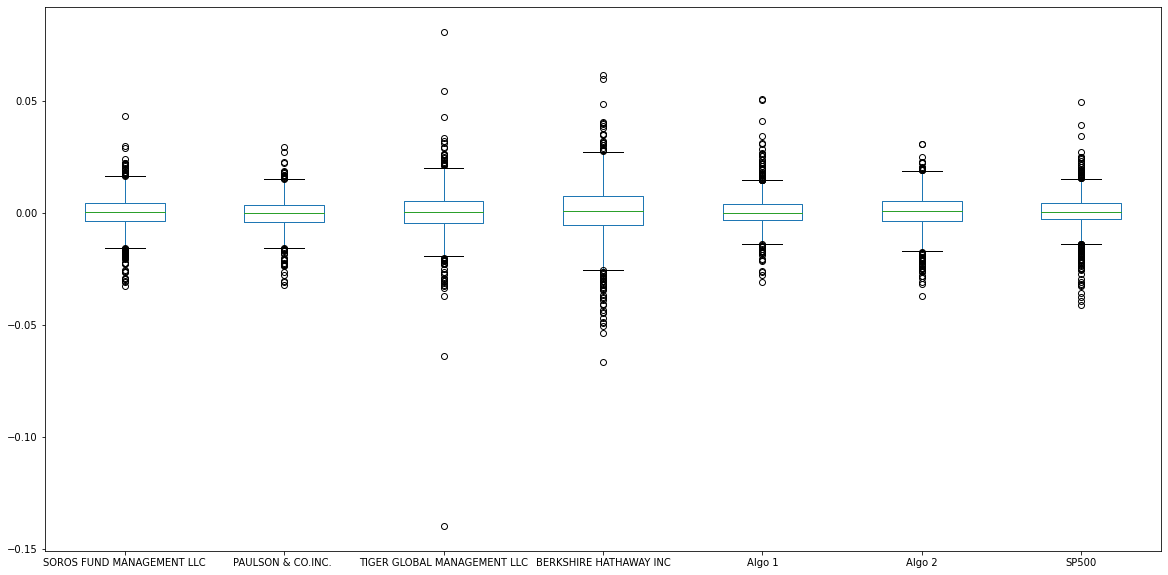

In [42]:
# Box plot to visually show risk
combined_daily_rtn.plot.box(figsize=[20,10])

### Calculate Standard Deviations

In [43]:
# Calculate the daily standard deviations of all portfolios
combined_daily_std = combined_daily_rtn.std()
combined_daily_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
SP500                          0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [44]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = combined_daily_rtn['SP500'].std()
sp500_std

# Determine which portfolios are riskier than the S&P 500
#Use a boolean statement to determine which portfolios are riskier than S&P 500
combined_daily_rtn.std() > sp500_std

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
SP500                          False
dtype: bool

### Calculate the Annualized Standard Deviation

In [45]:
# Calculate the annualized standard deviation (252 trading days)
combined_annual_std = combined_daily_std * np.sqrt(252)
combined_annual_std


SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
SP500                          0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

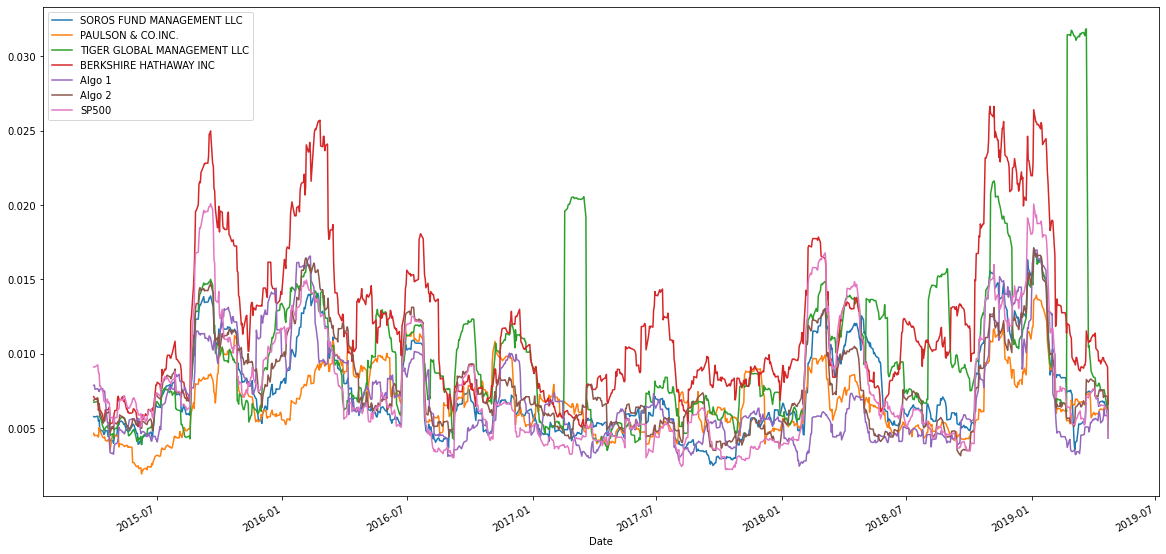

In [46]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_roll_std = combined_daily_rtn.rolling(window=21).std()

# Plot the rolling standard deviation
combined_roll_std.plot(figsize=[20,10])

### Calculate and plot the correlation

In [47]:
# Calculate the correlation
correlation = combined_daily_rtn.corr()

# Display de correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
SP500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:xlabel='Date'>

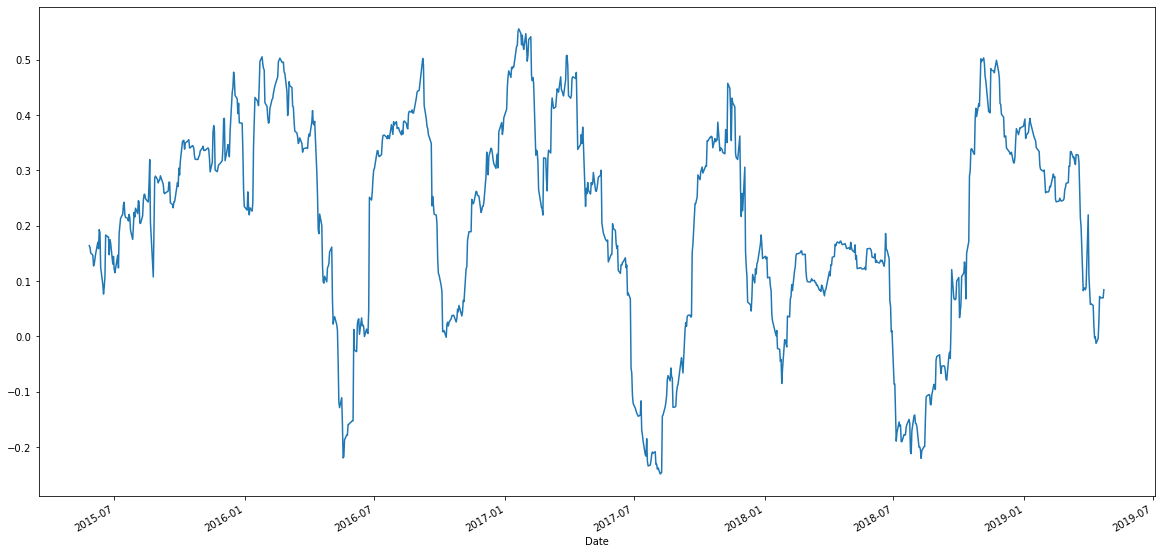

In [48]:
# Calculate covariance of a single portfolio
cov_algo1_sp500 = combined_daily_rtn['Algo 1'].cov(combined_daily_rtn['SP500'])

# Calculate variance of S&P 500
var_sp500 = combined_daily_rtn['SP500'].var()

# Computing beta
algo1_beta = cov_algo1_sp500/var_sp500
algo1_beta

# Plot beta trend
rolling_cov = combined_daily_rtn['Algo 1'].rolling(window=60).cov(combined_daily_rtn['SP500'])
rolling_var = combined_daily_rtn['SP500'].rolling(window=60).var()
rolling_beta = rolling_cov/rolling_var
rolling_beta.plot(figsize=[20,10])

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

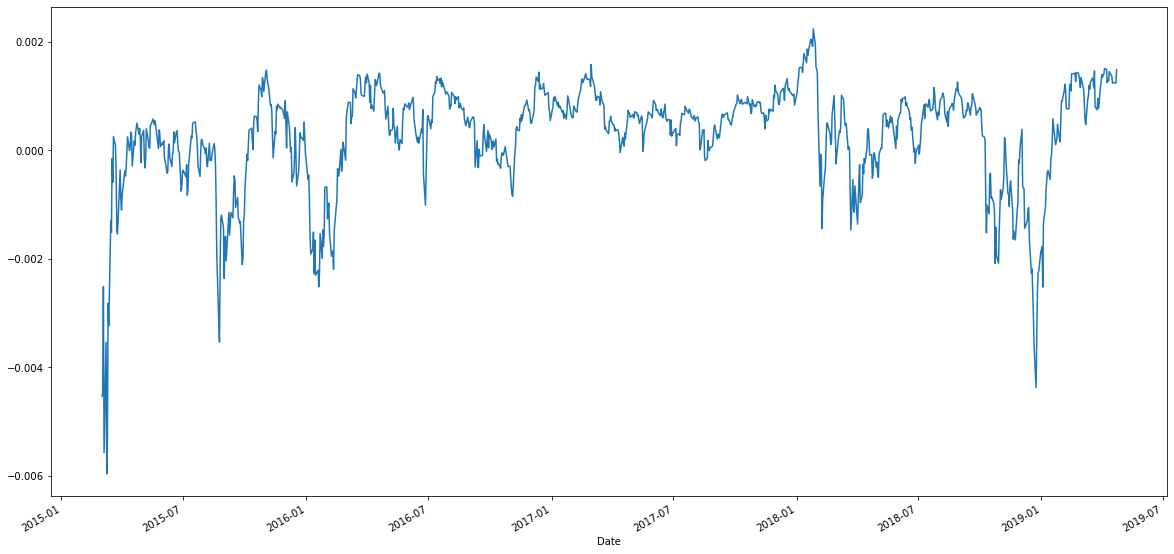

In [49]:
# Use `ewm` to calculate the rolling window
sp500_ewm = combined_daily_rtn['SP500'].ewm(halflife=21).mean()
sp500_ewm.plot(figsize=[20,10])

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [51]:
# Read in the daily yield to maturity (ytm) for 1 yr treasury to serve as proxy for the return on the risk free asset
risk_free_path = Path(r"C:/Users/dredm/Desktop/Daryl/Fintech_Bootcamp/Git_Repos/uw-fintech-spring-21/Homework/04-Pandas/Instructions/Starter_Code/Resources/yield_1yr_treasury.csv")
risk_free_df = pd.read_csv(risk_free_path, index_col='Date', infer_datetime_format=True, parse_dates=True)
risk_free_df = risk_free_df.sort_index()

#check data type
risk_free_df.dtypes

#adjust the values from percentage values to decimal values and from yearly ytm to daily ytm  
risk_free_rtn_df = (risk_free_df / 100)/252

#drop nulls
risk_free_rtn_df = risk_free_rtn_df.dropna() 
 
#concat risk free data frame with portfolio dataframe
port_rfr_df = pd.concat([combined_daily_rtn, risk_free_rtn_df], axis='columns', join='inner')

# Annualized Sharpe Ratios
annualized_Sharpe = 252 * ((port_rfr_df.mean() - port_rfr_df['Risk Free Rate'].mean())) / (port_rfr_df.std() *np.sqrt(252)) 
annualized_Sharpe

SOROS FUND MANAGEMENT LLC      0.317035
PAULSON & CO.INC.             -0.575558
TIGER GLOBAL MANAGEMENT LLC   -0.198610
BERKSHIRE HATHAWAY INC         0.590482
Algo 1                         1.264948
Algo 2                         0.421576
SP500                          0.596884
Risk Free Rate                 0.000000
dtype: float64

<AxesSubplot:>

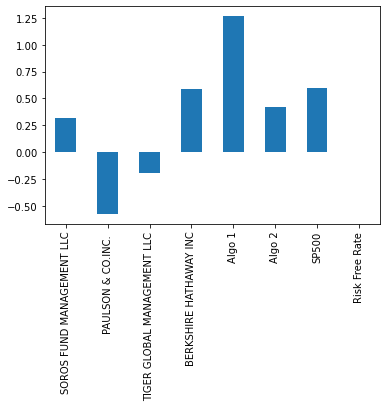

In [52]:
# Visualize the sharpe ratios as a bar plot
annualized_Sharpe.plot(kind='bar')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!
#The Algo 1 portfolio is the best performing portfolio on both an absolute return basis and a risk adjusted return basis. 
#The Algo 2 portfolio underperforms both the SP500 and the Berkshire Hathaway portfolio on an absolute return basis and on a risk adjusted return basis. However, the Algo 2 portfolio outperforms the other whale portfolios in both absolute returns and on risk adjusted returns.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [53]:
# Reading data from 1st stock
goog_path = Path(r"C:/Users/dredm/Desktop/Daryl/Fintech_Bootcamp/Git_Repos/uw-fintech-spring-21/Homework/04-Pandas/Instructions/Starter_Code/Resources/goog_historical.csv")
goog_df = pd.read_csv(goog_path, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)
goog_df = goog_df.sort_index()
goog_df


,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59
...,...,...
2019-05-03,GOOG,1185.40
2019-05-06,GOOG,1189.39
2019-05-07,GOOG,1174.10


In [54]:
# Reading data from 2nd stock
aapl_path = Path(r"C:/Users/dredm/Desktop/Daryl/Fintech_Bootcamp/Git_Repos/uw-fintech-spring-21/Homework/04-Pandas/Instructions/Starter_Code/Resources/aapl_historical.csv")
aapl_df = pd.read_csv(aapl_path, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)
aapl_df = aapl_df.sort_index()
aapl_df

,Symbol,NOCP
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99
...,...,...
2019-05-03,AAPL,211.75
2019-05-06,AAPL,208.48
2019-05-07,AAPL,202.86


In [55]:
# Reading data from 3rd stock
cost_path = Path(r"C:/Users/dredm/Desktop/Daryl/Fintech_Bootcamp/Git_Repos/uw-fintech-spring-21/Homework/04-Pandas/Instructions/Starter_Code/Resources/cost_historical.csv")
cost_df = pd.read_csv(cost_path, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)
cost_df = cost_df.sort_index()
cost_df

,Symbol,NOCP
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60
...,...,...
2019-05-03,COST,244.62
2019-05-06,COST,244.23
2019-05-07,COST,240.18


In [56]:
# Combine all stocks in a single DataFrame
my_combined_df = pd.concat([goog_df, aapl_df, cost_df], axis='columns', join='inner')
my_combined_df

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2018-05-11,GOOG,1098.26,AAPL,188.59,COST,195.76
2018-05-14,GOOG,1100.20,AAPL,188.15,COST,195.88
2018-05-15,GOOG,1079.23,AAPL,186.44,COST,195.48
2018-05-16,GOOG,1081.77,AAPL,188.18,COST,198.71
2018-05-17,GOOG,1078.59,AAPL,186.99,COST,199.60
...,...,...,...,...,...,...
2019-05-03,GOOG,1185.40,AAPL,211.75,COST,244.62
2019-05-06,GOOG,1189.39,AAPL,208.48,COST,244.23
2019-05-07,GOOG,1174.10,AAPL,202.86,COST,240.18


In [57]:
# Reset Date index
#the index of the dataframe is Trade DATE
my_combined_df.index

#change name of the index from Trade DATE to Date
my_combined_df.index.names = ['Date']
my_combined_df                        

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Date,,,,,,
2018-05-11,GOOG,1098.26,AAPL,188.59,COST,195.76
2018-05-14,GOOG,1100.20,AAPL,188.15,COST,195.88
2018-05-15,GOOG,1079.23,AAPL,186.44,COST,195.48
2018-05-16,GOOG,1081.77,AAPL,188.18,COST,198.71
2018-05-17,GOOG,1078.59,AAPL,186.99,COST,199.60
...,...,...,...,...,...,...
2019-05-03,GOOG,1185.40,AAPL,211.75,COST,244.62
2019-05-06,GOOG,1189.39,AAPL,208.48,COST,244.23
2019-05-07,GOOG,1174.10,AAPL,202.86,COST,240.18


In [58]:
# Reorganize portfolio data by having a column per symbol
#Rename columns from NOCP to the actual stock symbol 
my_combined_df.columns.values[1] = 'GOOG'
my_combined_df.columns.values[3] = 'AAPL'
my_combined_df.columns.values[5] = 'COST'

#drop the Symbol columns
my_combined_df = my_combined_df.drop(columns=['Symbol'])
my_combined_df

,GOOG,AAPL,COST
Date,,,
2018-05-11,1098.26,188.59,195.76
2018-05-14,1100.20,188.15,195.88
2018-05-15,1079.23,186.44,195.48
2018-05-16,1081.77,188.18,198.71
2018-05-17,1078.59,186.99,199.60
...,...,...,...
2019-05-03,1185.40,211.75,244.62
2019-05-06,1189.39,208.48,244.23
2019-05-07,1174.10,202.86,240.18


In [59]:
# Calculate daily returns
my_combined_rtn_df = my_combined_df.pct_change()

# Drop NAs
my_combined_rtn_df.dropna(inplace=True)

# Display sample data
my_combined_rtn_df

,GOOG,AAPL,COST
Date,,,
2018-05-14,0.001766,-0.002333,0.000613
2018-05-15,-0.019060,-0.009088,-0.002042
2018-05-16,0.002354,0.009333,0.016523
2018-05-17,-0.002940,-0.006324,0.004479
2018-05-18,-0.011339,-0.003637,-0.003206
...,...,...,...
2019-05-03,0.019602,0.012431,0.007953
2019-05-06,0.003366,-0.015443,-0.001594
2019-05-07,-0.012855,-0.026957,-0.016583


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [60]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
my_portfolio_rtn = my_combined_rtn_df.dot(weights)
# Display sample data
my_portfolio_rtn

Date
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
                ...   
2019-05-03    0.013329
2019-05-06   -0.004557
2019-05-07   -0.018798
2019-05-08   -0.000547
2019-05-09   -0.001751
Length: 249, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

<AxesSubplot:xlabel='Date'>

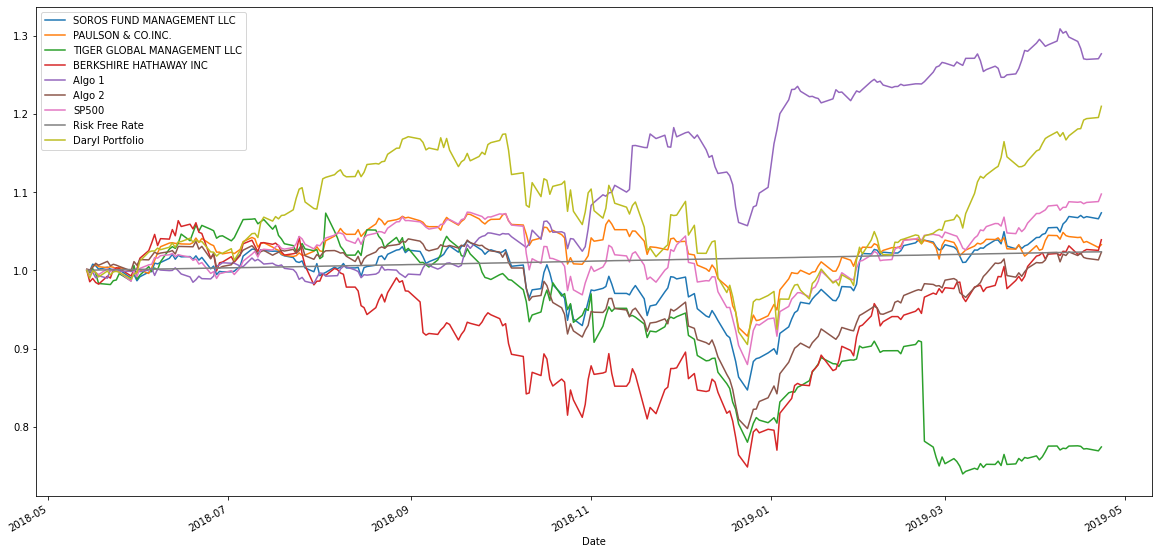

In [61]:
# Join your returns DataFrame to the original returns DataFrame
full_combined_df = pd.concat([port_rfr_df, my_portfolio_rtn], axis='columns', join='inner')

#Name my portfolio
full_combined_df.columns.values[8] = 'Daryl Portfolio'

#Calculate and plot cumulative returns of all portfolios
cum_full_rtn = (1+full_combined_df).cumprod()
cum_full_rtn.plot(figsize=[20,10])

In [62]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
full_combined_df.dropna(inplace=True)
full_combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,Risk Free Rate,Daryl Portfolio
Date,,,,,,,,,
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000090,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,0.000092,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.000092,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,0.000092,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,0.000092,-0.006061
...,...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000097,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.000097,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.000097,0.001545


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [63]:
# Calculate the annualized `std`
full_daily_std = full_combined_df.std()
full_annual_std = full_daily_std * np.sqrt(252)
full_annual_std

SOROS FUND MANAGEMENT LLC      0.146000
PAULSON & CO.INC.              0.116789
TIGER GLOBAL MANAGEMENT LLC    0.232801
BERKSHIRE HATHAWAY INC         0.247028
Algo 1                         0.134016
Algo 2                         0.139088
SP500                          0.151269
Risk Free Rate                 0.000081
Daryl Portfolio                0.209941
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

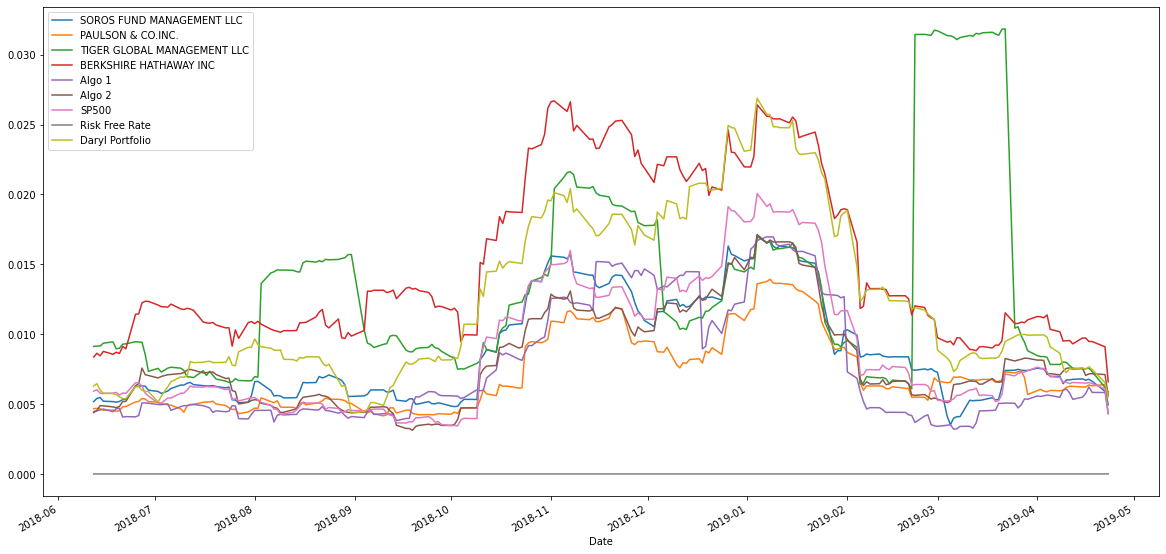

In [64]:
# Calculate rolling standard deviation
full_roll_std = full_combined_df.rolling(window=21).std()
# Plot rolling standard deviation
full_roll_std.plot(figsize=[20,10])

### Calculate and plot the correlation

In [65]:
# Calculate and plot the correlation
full_correlation = full_combined_df.corr()
full_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,Risk Free Rate,Daryl Portfolio
SOROS FUND MANAGEMENT LLC,1.000000,0.790469,0.480453,0.814988,0.346775,0.860863,0.874929,-0.050199,0.728905
PAULSON & CO.INC.,0.790469,1.000000,0.485493,0.648156,0.367222,0.782278,0.764881,-0.076077,0.641147
TIGER GLOBAL MANAGEMENT LLC,0.480453,0.485493,1.000000,0.326418,0.119800,0.411881,0.481560,-0.092021,0.390048
BERKSHIRE HATHAWAY INC,0.814988,0.648156,0.326418,1.000000,0.332197,0.780432,0.851687,-0.011037,0.801117
Algo 1,0.346775,0.367222,0.119800,0.332197,1.000000,0.372809,0.299046,0.078368,0.273064
Algo 2,0.860863,0.782278,0.411881,0.780432,0.372809,1.000000,0.874575,-0.096181,0.737505
SP500,0.874929,0.764881,0.481560,0.851687,0.299046,0.874575,1.000000,-0.056640,0.869537
Risk Free Rate,-0.050199,-0.076077,-0.092021,-0.011037,0.078368,-0.096181,-0.056640,1.000000,-0.089768
Daryl Portfolio,0.728905,0.641147,0.390048,0.801117,0.273064,0.737505,0.869537,-0.089768,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:xlabel='Date'>

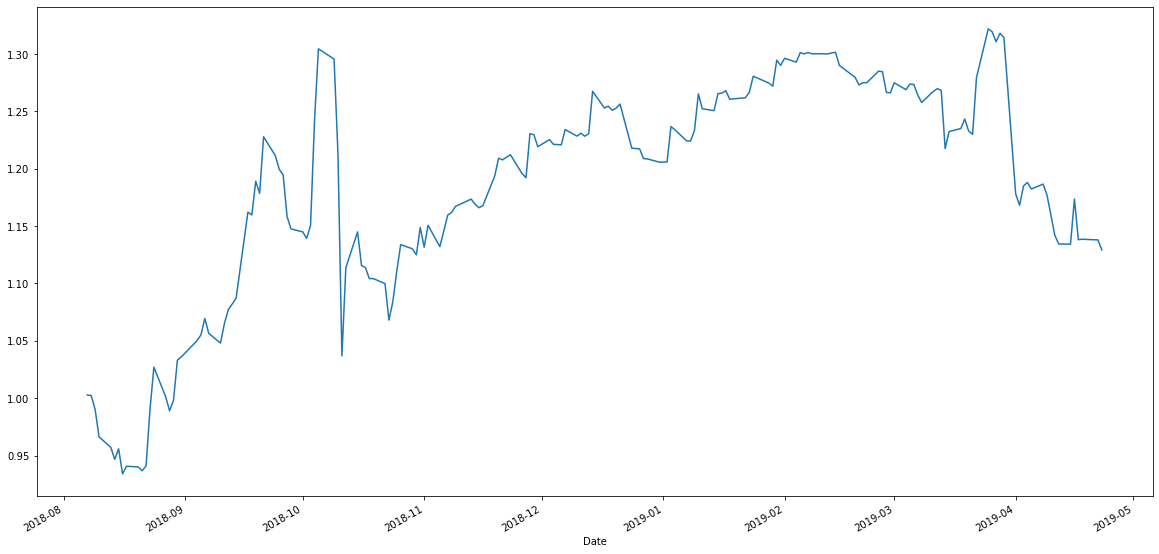

In [66]:
# Calculate and plot Beta
roll_cov_Daryl_SP500 = full_combined_df['Daryl Portfolio'].rolling(window=60).cov(full_combined_df['SP500'])
roll_var_SP500 = full_combined_df['SP500'].rolling(window=60).var()
roll_beta_Daryl = roll_cov_Daryl_SP500 / roll_var_SP500
roll_beta_Daryl.plot(figsize=[20,10])

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [67]:
# Calculate Annualzied Sharpe Ratios
annualized_Sharpe_v2 = 252 * ((full_combined_df.mean() - full_combined_df['Risk Free Rate'].mean())) / (full_combined_df.std() *np.sqrt(252)) 
annualized_Sharpe_v2

SOROS FUND MANAGEMENT LLC      0.421952
PAULSON & CO.INC.              0.140157
TIGER GLOBAL MANAGEMENT LLC   -1.165046
BERKSHIRE HATHAWAY INC         0.188106
Algo 1                         1.835082
Algo 2                         0.064871
SP500                          0.569313
Risk Free Rate                 0.000000
Daryl Portfolio                0.957994
dtype: float64

<AxesSubplot:>

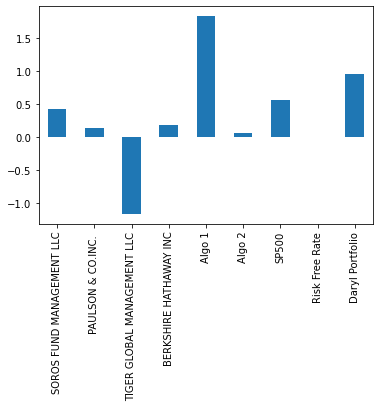

In [68]:
# Visualize the sharpe ratios as a bar plot
annualized_Sharpe_v2.plot(kind = 'bar')

### How does your portfolio do?

Write your answer here!

The Daryl portfolio was the second best performing portfolio of the group. It outperformed all portfolios, except 
the Algo 1 portfolio, on both an absolute return basis and risk adjusted return basis.